# Encontro 8: Centro e Periferia

In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import seaborn as sns

import socnet as sn

from scipy.stats.stats import pearsonr
from scipy.optimize import minimize

%matplotlib inline

## Inovação no Jazz: no Centro ou na Periferia?

Nesta atividade, vamos explorar onde surgem as inovações no Jazz. O período de análise inclui os anos 50 e 60 do século passado, quando músicos como Dave Brubeck e Miles Davis ficaram extremamente famosos. 

De onde vem as inovações? São tantas as possibilidades! Será que o artista genial tem uma personalidade distinta? Será que a estrutura neurológica de seu cérebro produz acordes dissonantes e improvisações geniais? Será que escutou uma britadeira quando era pequeno e com isso obteve inspiração para um novo ritmo? De que forma sua história de vida conta? É importante que seus pais tenham lhe incentivado? Será que é importante ter sido órfão e ganhar sustento como trombonista na bandinha da cidade?

São tantas as possíveis explicações! Possivelmente são infinitas as explicações e por isso nunca poderíamos ficar satisfeitos, certo? Errado: o trabalho científico precisa assumir que não conhecerá tudo sobre um fenômeno, mas ainda assim buscar o que for possível e relevante. Toda investigação científica necessita de alguma forma iniciar com o contexto, com as teorias conhecidas e delinear os principais mecanismos que se espera que estejam em operação para explicar o fenômeno.


### Scaffold 1: Entendimento do Contexto e Delineamento dos Mecanismos

Nesse estudo, tomaremos algumas decisões de redução do contexto para alguns mecanismos específicos. Em primeiro lugar, não nos importará a biografia do músico: não iremos ler a biografia de cada músico inovador. Ainda assim, poderemos em algum momento tentar capturar um pouco dessa história de vida a partir de variáveis como *gênero*, *idade*, *raça* e *local de nascimento*. De forma análoga, não iremos nos deter em variáveis que não podemos observar ou só podemos observar a alto custo, como a personalidade e minúcias da vida do artista.

A *localização* do artista pode ser extremamente interessante: será que é importante que o artista esteja tocando em Nova Iorque ou em Bruxelas? Sabemos que Nova Iorque foi e ainda é o principal centro de produção de Jazz no mundo. Então poderíamos também indagar se faria diferença verificar quais artistas frequentavam os principais clubes no SoHo, ou as sessões de improvisação no Harlem.

Mas por que assumimos que *geografia*, *espaço* e *local* são importantes? São importantes porque os artistas conhecem novos estilos ao encontrar face-a-face com outros músicos. Desta forma, são capazes de ter acesso direto a essas músicas, muito antes que alcancem as estações de rádio e os estúdios de gravação. A partir da ideia de que o contato direto entre os músicos é condição importante para a troca de informações, aprendizado mútuo, podemos dar um passo adicional e afirmar que o que realmente importa para um músico é a sua posição na rede de relacionamentos no mundo do Jazz.

A ideia de que inovação no jazz está relacionada com a posição do músico no mundo do Jazz é uma proposição interessante, mas ainda muito genérica para poder ser transformada em uma hipótese testável. A ideia de *posição* pode ser definida de muitas formas, pode estar associada a muitos mecanismos distintos, e pode ser operacionalizada de formas múltiplas. Possivelmente a intuição de posição é uma das mais populares em Análise de Redes Sociais e por isso o "mercado de ideias" sobre como definir essa intuição esteja tão abarrotado de propostas.

Entre as diversas possibilidades de entendimento do que significa posição, assumiremos um pressuposto importante: para caracterizar um indivíduo, precisamos pensar em qual *região* da rede ele pertence. Geralmente, em um mundo artístico, os padrões de relacionamento entre os músicos formam uma rede com um *centro* com membros altamente relacionados entre si e uma *periferia* na qual os membros se relacionam com o centro mas não entre si. Podemos observar esse fenômeno em outros contextos também: lembra da rede dos usuários que o Trump segue no Twitter? Vários *pundits* eram periféricos.

O surgimento de um centro se dá por várias razões, incluindo o *Efeito Mateus* que vimos na primeira aula no contexto de citações. Por motivos de simplificação, pensaremos em apenas duas regiões um centro e uma periferia, embora modelos mais complexos, como por exemplo modelos de múltiplos centros, sejam possíveis. Precisamos ainda de um pressuposto adicional: o centro de uma rede é onde o “burburinho” ocorre. Esses dois pressupostos são razoáveis: é plausível que o centro de uma rede seja onde haja mais densidade de relações, e também assumimos que mesmo que um indivíduo não seja particularmente bem conectado, basta que ele pertença ao centro para estar exposto a esse “caldo criativo”.

Entretanto, sem abandonar essa abordagem de “centro e periferia”, poderíamos também argumentar de forma plausível que inovações surgem na periferia do mundo do jazz em vez do centro. Se o sucesso comercial exige que os músicos centrais sigam certos padrões consagrados, apenas músicos periféricos são livres (Ou irrelevantes? Ou insignificantes?) o suficiente para testarem soluções novas. Eles não têm muito a perder, certo? 

Nos parágrafos acima exploramos o contexto do jazz e, de forma bastante informal, identificamos alguns mecanismos que poderiam explicar o surgimento de inovações. Na próxima seção, adotaremos uma abordagem mais formal para traduzir mecanismos a hipóteses.


### Scaffold 2: Tradução dos Mecanismos em Hipóteses

Músicos presentes no centro da rede têm mais acesso a outros músicos do jazz, e isso os leva a conhecer novos estilos de forma mais rápida. Esse acesso privilegiado possibilita o aprendizado mais rápido de novos estilos e rápida recombinação de elementos musicais. A recombinação de elementos musicais leva à emersão de novos estilos e inovações. Logo:

> Hipótese 1: músicos no centro da rede apresentam maiores chances de inovar

Em contrapartida, músicos na periferia tem menor pressão para se conformar aos padrões estabelecidos pela Indústria Fonográfica e pela comunidade de músicos. Desta forma, são mais livres para experimentar novas combinações artísticas. Assim:

> Hipótese 2: músicos na periferia da rede apresentam maiores chances de inovar

Eu sei o que vocês estão pensando: peraí, que migué é esse? Fazer um conjunto de hipóteses que cobrem todo o universo de possibilidades é fácil!

Mas não foi isso o que fizemos! Repare que:

* ambas as hipóteses são sustentadas por argumentos coerentes com o contexto apresentado; e
* elas **NÃO** cobrem todo o universo de possibilidades. Ambas podem estar erradas, por exemplo.

Mas eu concordo com uma coisa: a formulação ainda não está completa. Para estar completa, precisa de uma formalização do que é centro, uma formalização do que é periferia e uma formalização de que grandezas esperamos estar relacionadas.

Em dado momento, os professores vão fazer uma exposição sobre o conceito de *coreness*. Use o espaço abaixo para anotações.

### Scaffold 3: Operacionalização e Teste das Hipóteses

In [2]:
def cost(c, A):
    row = np.matrix(c)

    C = np.multiply(row.transpose(), row)

    correlation, _ = pearsonr(C.flat, A.flat)

    return -correlation


def write_coreness(g):
    length = g.number_of_nodes()

    c = np.random.rand(length)

    A = sn.build_matrix(g)

    bounds = [(0, 1) for _ in range(length)]

    result = minimize(cost, c, args=(A,), bounds=bounds)

    norm = 0

    for i, n in enumerate(g.nodes):
        g.nodes[n]['coreness'] = result['x'][i]

        norm += g.nodes[n]['coreness'] ** 2

    for n in g.nodes:
        g.nodes[n]['coreness'] /= norm

Dados disponíveis:
* as redes cobrem os períodos de 1930 a 1969 e estão separados por ano;
* os nós são artistas e existe uma aresta entre dois artistas se eles participaram de uma mesma sessão de gravação;
* cada nó tem um atributo `sessions` que indica de quantas sessões ele participu e um atributo `innovats` que indica de quantas sessões *iovadoras* ele participou.
* cada aresta possui um peso que é inversamente proporcional ao tamanho das sessões.

In [3]:
# year = 1950
# g = sn.load_graph('graphs/{0}.gml'.format(year))
# sns.distplot([g.nodes[n]['sessions'] for n in g.nodes], kde=False);

In [4]:
innovats_dict = {}
for i in range(1930, 1970):
    year = i
    g = sn.load_graph('graphs/{0}.gml'.format(year))
    sg = g.copy()

    nodes = list(sg.nodes)
    
    total_innovats = 0
    for n in nodes:
        total_innovats = total_innovats + sg.nodes[n]['innovats']
    innovats_dict[year] = total_innovats

In [5]:
#Rodando a primeira vez, descobrimos que os anos interessantes são 1953 a 1968
innovats_dict

{1930: 0,
 1931: 0,
 1932: 0,
 1933: 0,
 1934: 0,
 1935: 0,
 1936: 0,
 1937: 0,
 1938: 0,
 1939: 0,
 1940: 0,
 1941: 0,
 1942: 0,
 1943: 0,
 1944: 0,
 1945: 0,
 1946: 19,
 1947: 0,
 1948: 0,
 1949: 10,
 1950: 0,
 1951: 5,
 1952: 0,
 1953: 109,
 1954: 182,
 1955: 172,
 1956: 570,
 1957: 552,
 1958: 330,
 1959: 389,
 1960: 206,
 1961: 385,
 1962: 252,
 1963: 209,
 1964: 189,
 1965: 255,
 1966: 269,
 1967: 332,
 1968: 173,
 1969: 0}

Por simplicidade, vou remover da rede os artistas que participaram de poucas sessões.

In [6]:
graphs_dict = {}
for i in range(1953, 1969):
    year = i
    g = sn.load_graph('graphs/{0}.gml'.format(year))
    sg = g.copy()

    nodes = list(sg.nodes)

    for n in nodes:
        if sg.nodes[n]['sessions'] < 10:
            sg.remove_node(n)
    graphs_dict[year] = sg

# sns.distplot([sg.nodes[n]['sessions'] for n in sg.nodes], kde=False);

Agora estamos prontos para calcular o coreness.

In [8]:
for graph in graphs_dict:
    g = graphs_dict[graph]
    write_coreness(g)

In [9]:
graphs_dict

{1953: <networkx.classes.graph.Graph at 0xb97f050>,
 1954: <networkx.classes.graph.Graph at 0xd595b50>,
 1955: <networkx.classes.graph.Graph at 0x6457f70>,
 1956: <networkx.classes.graph.Graph at 0xdc1b030>,
 1957: <networkx.classes.graph.Graph at 0xf6ca110>,
 1958: <networkx.classes.graph.Graph at 0xdb40070>,
 1959: <networkx.classes.graph.Graph at 0x9b80b30>,
 1960: <networkx.classes.graph.Graph at 0x2c45170>,
 1961: <networkx.classes.graph.Graph at 0xde32c30>,
 1962: <networkx.classes.graph.Graph at 0xd85fe10>,
 1963: <networkx.classes.graph.Graph at 0x8140b0>,
 1964: <networkx.classes.graph.Graph at 0xd8e1310>,
 1965: <networkx.classes.graph.Graph at 0x81a890>,
 1966: <networkx.classes.graph.Graph at 0xd38f790>,
 1967: <networkx.classes.graph.Graph at 0xf48dff0>,
 1968: <networkx.classes.graph.Graph at 0x9d540b0>}

### Verificando relação

In [29]:
dataframes_dict = {}
for year in graphs_dict:
    sg = graphs_dict[year]
    dataframes_dict[year] = pd.DataFrame({
        'coreness': [sg.nodes[n]['coreness'] for n in sg.nodes],
        'innovats': [sg.nodes[n]['innovats'] for n in sg.nodes],
        'sessions': [sg.nodes[n]['sessions'] for n in sg.nodes],
        'innovats/sessions': [sg.nodes[n]['innovats']/sg.nodes[n]['sessions'] for n in sg.nodes],
        'year': [year for n in sg.nodes]
    })

data_corr = pd.DataFrame({
    'year': [year for year in dataframes_dict.keys()],
    'correlation': [data['innovats/sessions'].corr(data.coreness) for data in dataframes_dict.values()]
})

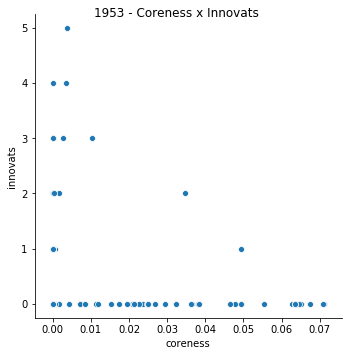

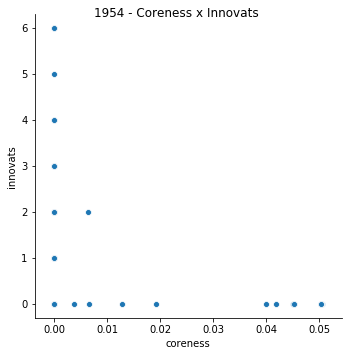

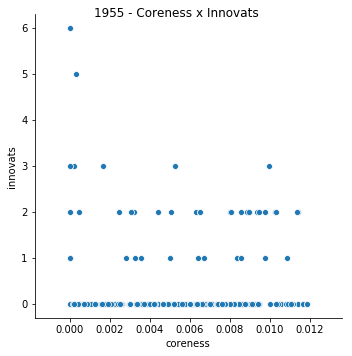

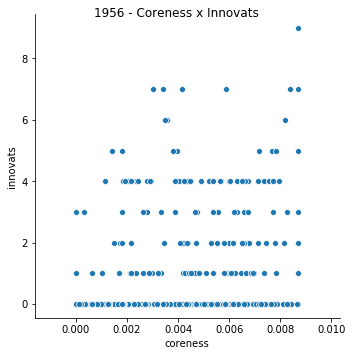

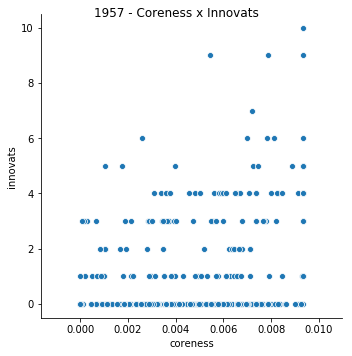

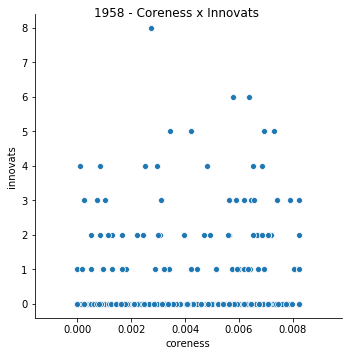

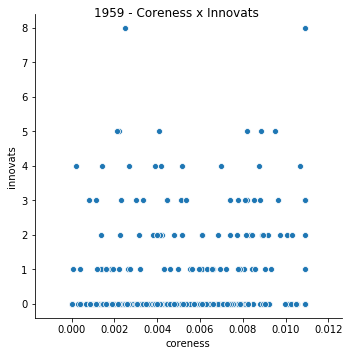

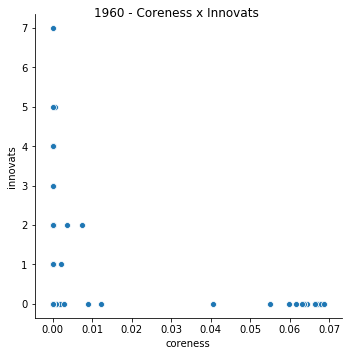

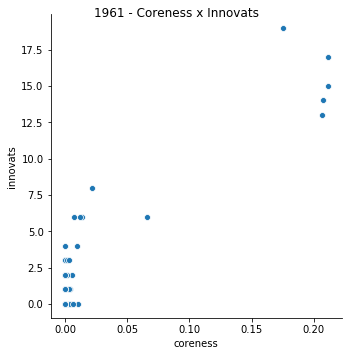

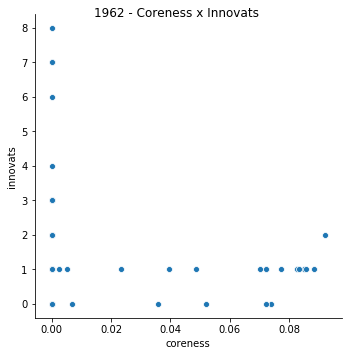

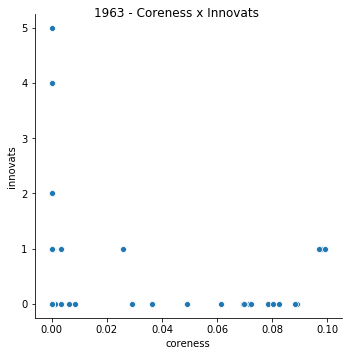

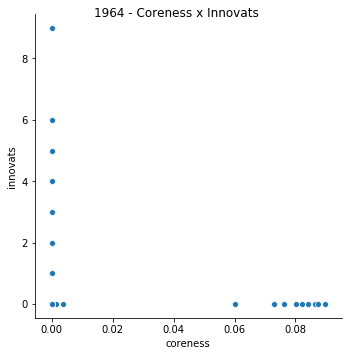

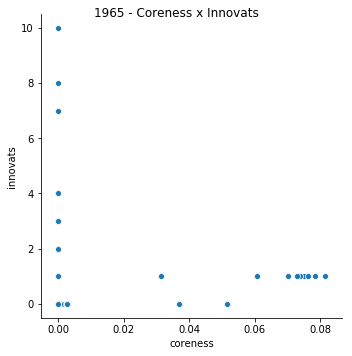

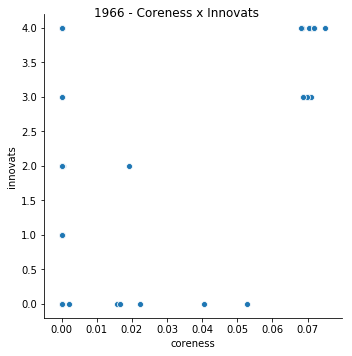

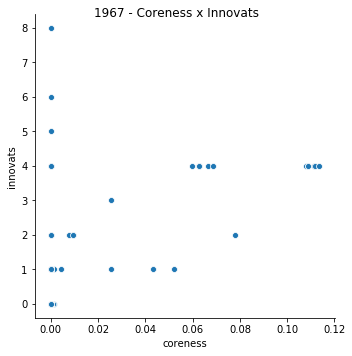

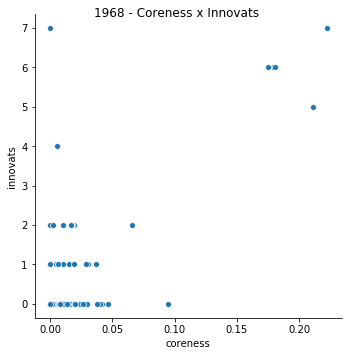

In [30]:
for year in dataframes_dict:
    data = dataframes_dict[year]
    g = sns.relplot(data=data, x='coreness', y='innovats')
    g.fig.suptitle('{0} - Coreness x Innovats'.format(year))

Nesses relplots, fica evidente que em 1961, 1968 e 1969 há uma grande relação entre as inovações e coreness, porém, nos outros anos essa relação não fica aparente, como em 1960 e 1962.

In [31]:
data_corr

,year,correlation
0,1953,-0.115543
1,1954,-0.153038
2,1955,-0.093718
3,1956,0.119565
4,1957,0.129691
5,1958,0.012201
6,1959,0.052884
7,1960,-0.128386
8,1961,0.627251
9,1962,0.008440


Ao fazer a correlação da porcentagem de inovação por sessão com o coreness, percebemos que os maiores índices de correlação são nos anos de 1961, 1967 e 1968, enquanto nos outros anos é bem baixa ou tem correlação negativa, ou seja, o coreness não costuma se relacionar com a inovação por sessão e essa relação pode variar muito entre os anos.

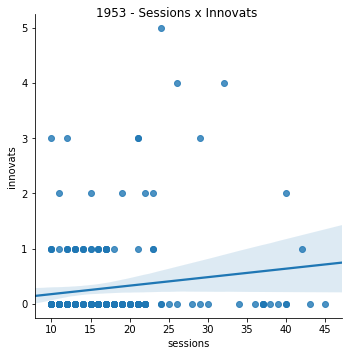

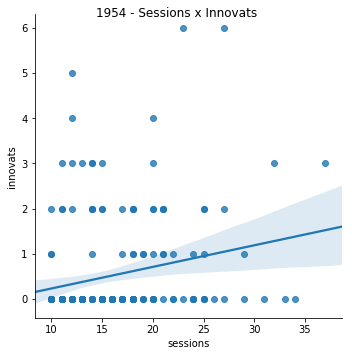

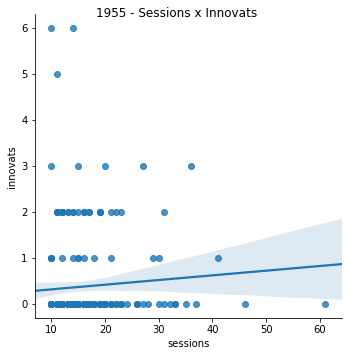

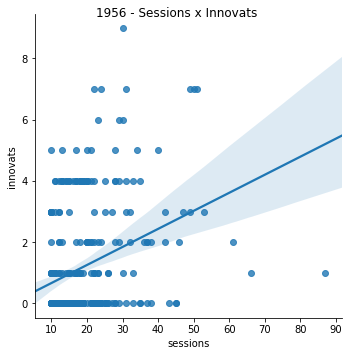

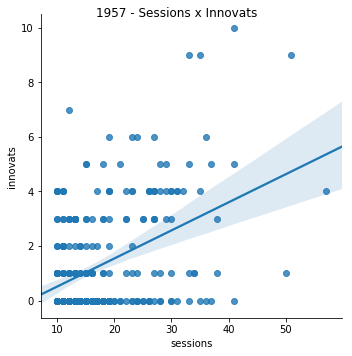

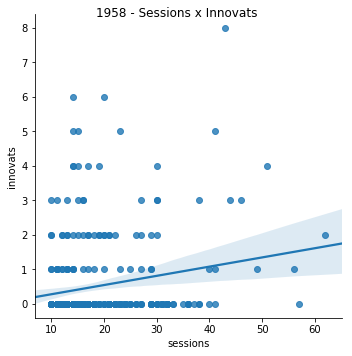

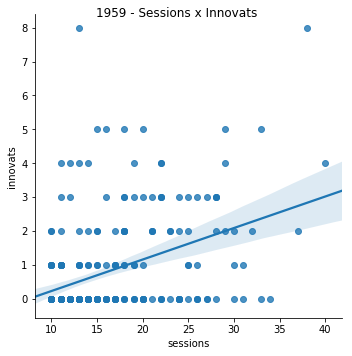

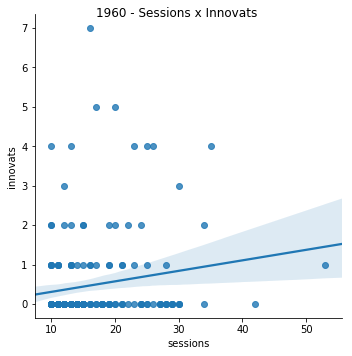

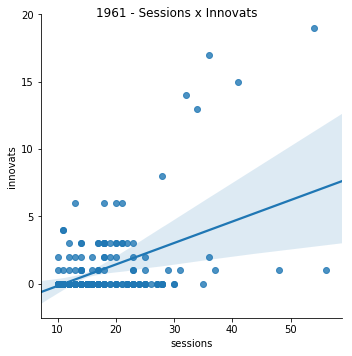

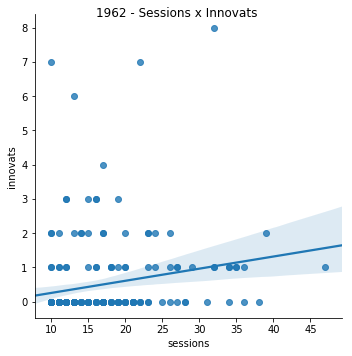

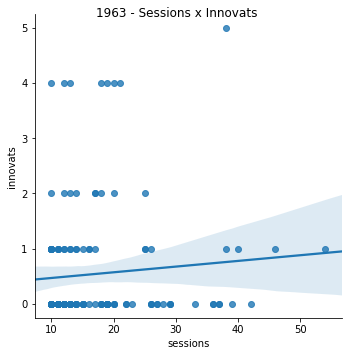

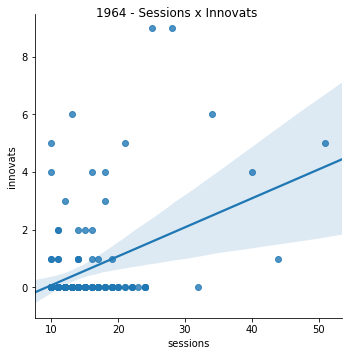

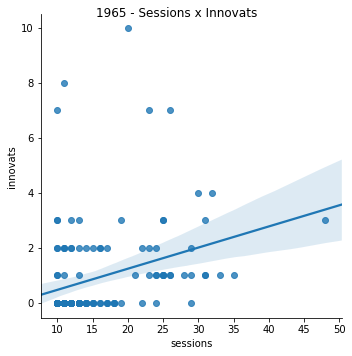

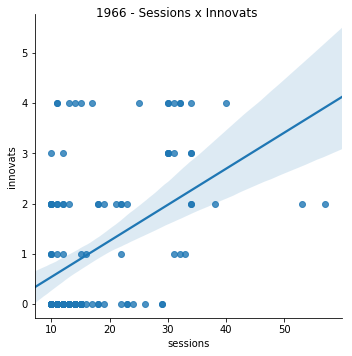

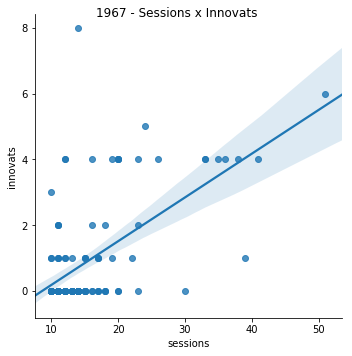

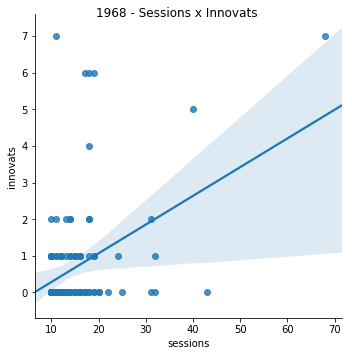

In [32]:
for year in dataframes_dict:
    data = dataframes_dict[year]
    g = sns.lmplot(x="sessions", y="innovats", data=data)
    g.fig.suptitle('{0} - Sessions x Innovats'.format(year))

In [33]:
for year in dataframes_dict:
    data = dataframes_dict[year]
    total = data.shape[0]
    inovacoes = total - data["innovats/sessions"].value_counts()[0]
    porcentagem = inovacoes/total
    print("""
    Ano: {0}
    Número de Artistas que participaram em sessões: {1},
    Número de Artistas que participaram em sessões com inovação: {2},
    Porcentagem: {3}
    """.format(year, total, inovacoes, porcentagem))


    Ano: 1953
    Número de Artistas que participaram em sessões: 244,
    Número de Artistas que participaram em sessões com inovação: 44,
    Porcentagem: 0.18032786885245902
    

    Ano: 1954
    Número de Artistas que participaram em sessões: 213,
    Número de Artistas que participaram em sessões com inovação: 50,
    Porcentagem: 0.2347417840375587
    

    Ano: 1955
    Número de Artistas que participaram em sessões: 268,
    Número de Artistas que participaram em sessões com inovação: 48,
    Porcentagem: 0.1791044776119403
    

    Ano: 1956
    Número de Artistas que participaram em sessões: 351,
    Número de Artistas que participaram em sessões com inovação: 144,
    Porcentagem: 0.41025641025641024
    

    Ano: 1957
    Número de Artistas que participaram em sessões: 318,
    Número de Artistas que participaram em sessões com inovação: 138,
    Porcentagem: 0.4339622641509434
    

    Ano: 1958
    Número de Artistas que participaram em sessões: 363,
    Número de 

Apesar de existirem anos com bastante correlação de coreness com taxa de inovação por sessão, a porcentagem de sessões com inovação parece não acompanhar esses anos com correlação alta, indicando que a coreness não interfere expressivamente.

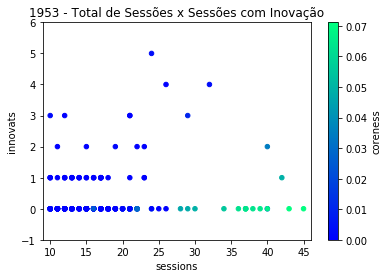

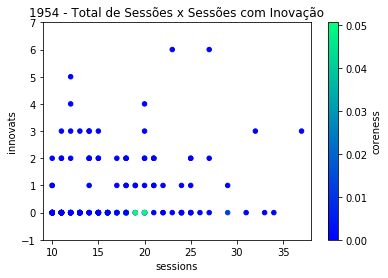

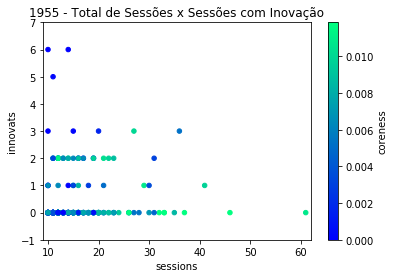

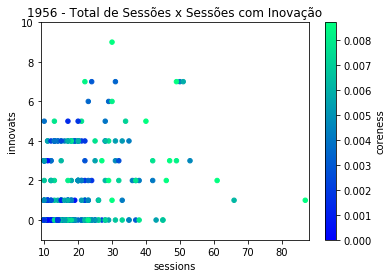

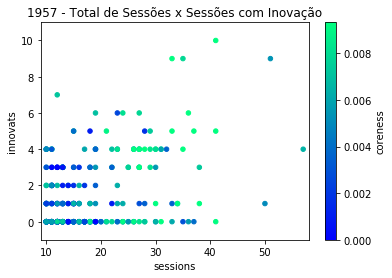

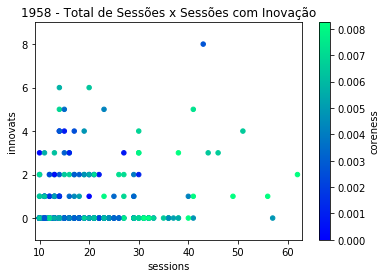

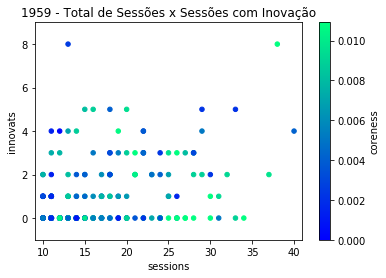

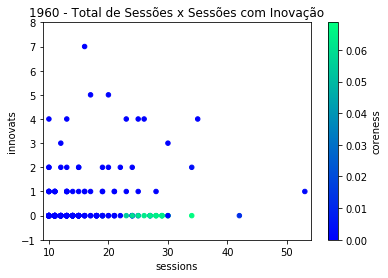

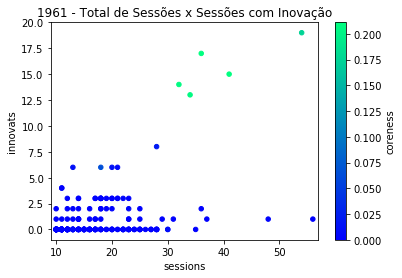

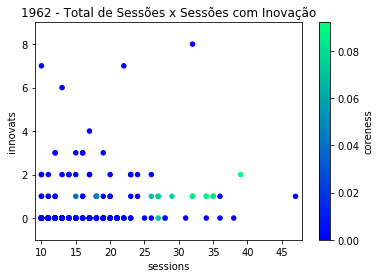

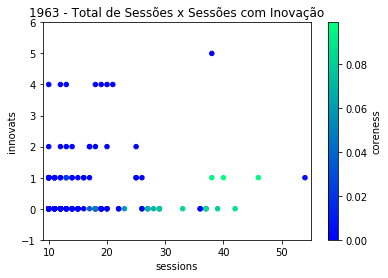

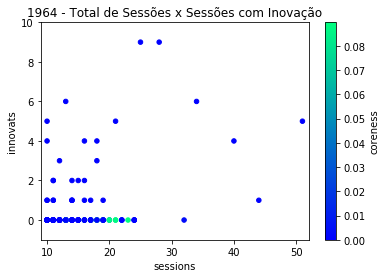

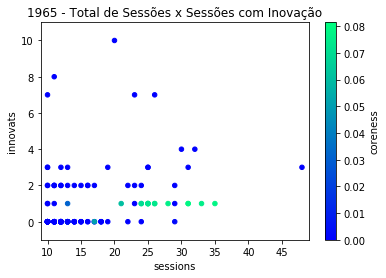

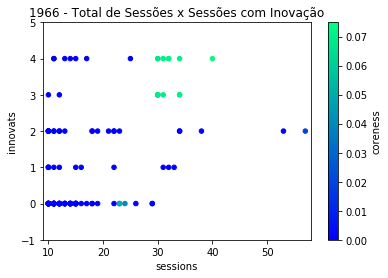

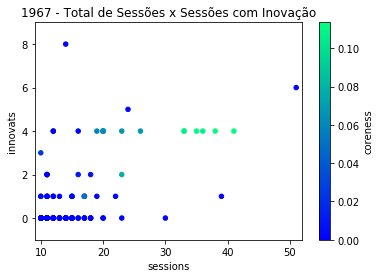

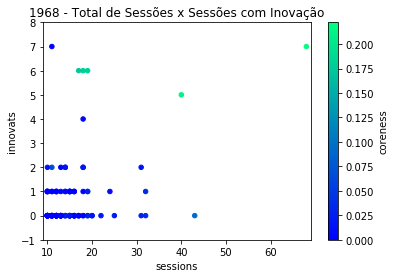

In [34]:
for year in dataframes_dict:
    data = dataframes_dict[year]
    sessions_innovats = data.plot.scatter(
    x="sessions",
    y="innovats",
    c="coreness",
    colormap="winter",
    title="{0} - Total de Sessões x Sessões com Inovação".format(year),
    xlim=(min(data.sessions) - 1,max(data.sessions) + 1),
    ylim=(min(data.innovats) - 1,max(data.innovats) + 1),
    sharex=False)

Aqui, confirmamos com mais detalhes que o coreness não tem muita correlação de inovação por sessão, exceto pelos anos de 1961, 1967 e 1968. Além de mostrar que com o coreness baixo, a quantidade de inovação costuma ser maior. Nos anos que não são excessões, mostra que com o coreness baixo, mesmo a quantidade de sessões baixas, a inovação é mais alta que com o coreness alto, o que indica que o aproveitamento das sessões são superiores nas periferias.

In [35]:
for dataframe in dataframes_dict:
    data = dataframes_dict[dataframe]
    head = data.sort_values(by="innovats/sessions", ascending=False).head(10)
    print('\n', head)


      coreness  innovats  sessions  innovats/sessions  year
134  0.002677         3        10           0.300000  1953
135  0.000000         3        12           0.250000  1953
131  0.003637         5        24           0.208333  1953
169  0.000000         2        11           0.181818  1953
180  0.000000         4        26           0.153846  1953
74   0.000000         3        21           0.142857  1953
165  0.000000         3        21           0.142857  1953
203  0.000290         2        15           0.133333  1953
209  0.003470         4        32           0.125000  1953
125  0.001670         2        19           0.105263  1953

      coreness  innovats  sessions  innovats/sessions  year
103       0.0         5        12           0.416667  1954
9         0.0         4        12           0.333333  1954
14        0.0         3        11           0.272727  1954
55        0.0         6        23           0.260870  1954
147       0.0         3        12           0.250000

In [45]:
dataframe_list = []
for dataframe in dataframes_dict:
    dataframe_list.append(dataframes_dict[dataframe])
    
df = pd.concat(dataframe_list)
df.sort_values(by="innovats/sessions", ascending=False).head(20)

,coreness,innovats,sessions,innovats/sessions,year
134,0.000000,8,11,0.727273,1965
212,0.000000,7,10,0.700000,1962
131,0.000000,7,10,0.700000,1965
61,0.000000,7,11,0.636364,1968
167,0.002518,8,13,0.615385,1959
103,0.000000,6,10,0.600000,1955
295,0.007198,7,12,0.583333,1957
83,0.000000,8,14,0.571429,1967
286,0.003813,5,10,0.500000,1956
59,0.000000,10,20,0.500000,1965


In [46]:
df[df['innovats/sessions'] > 0.00000].sort_values(by="innovats/sessions", ascending=False).tail(20)

,coreness,innovats,sessions,innovats/sessions,year
277,0.009299,1,38,0.026316,1957
133,0.096790,1,38,0.026316,1963
50,0.001356,1,39,0.025641,1967
45,0.099154,1,40,0.025000,1963
3,0.004236,1,40,0.025000,1958
100,0.008079,1,41,0.024390,1958
190,0.009758,1,41,0.024390,1955
106,0.049452,1,42,0.023810,1953
88,0.000000,1,44,0.022727,1964
38,0.097588,1,46,0.021739,1963


Observando as duas tabelas com as maiores e menores taxas de inovação por sessão, podemos perceber um fenômeno interessante: os artistas na tabela com as maiores taxas possuem menos sessões no total e a coreness média é bem baixa, enquanto que os artistas na tabela com as menores taxas possuem muito mais sessões no total, mas mantém a coreness baixa.

Como podemos analisar essa relação de forma mais analítica?


## Das análises à revisão da teoria

Muitas vezes, em um método científico lógico-dedutivo, geramos hipóteses que esperamos corroborar, e não estamos prontos para enfrentar resultados que fujam daquilo que é esperado. Por exemplo: deduzimos a hipótese de que a força da gravidade age de forma homogênea: corpos lançados simultaneamente de uma certa altura deverão cair na mesma velocidade. Se o experimento é “bem realizado”, obtemos o mesmo tempo de percurso de queda. Se os corpos chegam em momentos distintos, é possível que redesenhemos o experimento até acharmos o que esperamos. Por exemplo: se lançarmos uma bola de chumbo e uma folha de papel aberta de um prédio, é óbvio que a bola de chumbo chegará mais rápido. Mas fomos “treinados” a refazer o experimento e tomar algum objeto comparável à bola de chumbo, do que modelar a resistência do ar à folha de papel.

Entretanto, os resultados de um experimento ou de uma pesquisa podem “falhar” em corroborar as hipóteses desenvolvidas e dar pistas que nossa teoria não é completa. Esse é o final do ciclo de investigação científica e corresponde aos passos **4 (Interpretação dos resultados na linguagem de SNA) e 5 (Extrapolação/generalização dos resultados, reinterpretação do contexto, identificação de implicações e próximos passos)** de nosso curso. Antes de definir e dar diretrizes para esses passos, oferecemos um exemplo de uma pesquisa que realizou esses últimos passos.

Nosso exemplo se inicia com a diferença entre “laços fortes” e “laços fracos”, uma das teorias centrais na Sociologia (ver Granovetter, 1977). Essa teoria traz as seguintes ideias conectadas:

1.	Há diferença entre “laços fracos” e “laços fortes”. “Laços fortes” são relacionamentos com as pessoas próximas, íntimas; “laços fracos”, em contraste, são relacionamentos onde o elemento “confiança” não é tão forte.

2.	É preciso confiança para confidenciar assuntos sérios.

3.	Logo, as pessoas confidenciam assuntos sérios com laços fortes.

A partir dessa estrutura “dedutiva”, a pesquisa de “capital social” cresceu e desenvolveu uma ampla gama de ferramentas e abordagens, incluindo a “Core Discussion Network” (CDN), que foi incluído no censo americano (Burt, 1984). Através dessa ferramenta, se pergunta “com quem você discute assuntos importantes” e através dessa pergunta se identifica as pessoas que são “laços fortes” do entrevistado. Com o tempo, passou-se a inverter a ordem:

1.	CDN explicita laços fortes.

2.	Laços fortes do CDN serão ativados para confidências de assuntos importantes.

Mario Luis Small (2013) investigou de que forma o CDN muda no tempo. Seu intuito inicial era apenas explorar de que forma as pessoas eram agregadas ou expulsas da rede de laços fortes identificada através do CDN. Entretanto, ele percebeu que havia algumas inconsistências:

* Nem todos os “assuntos importantes” eram realmente “confidências” (Bearman & Parigi, 2004). Por exemplo, falar sobre “política” (um assunto importante que nem sempre se abre para um colega do trabalho) é muito diferente de falar sobre “divórcio” (um assunto emocionalmente forte que implicava em um grau de intimidade e confiança muito alto).

* Nem sempre as pessoas confidenciavam assuntos realmente importantes com as pessoas próximas citadas no CDN. Muitas vezes, Small percebeu, as pessoas preferiam falar sobre a possibilidade de abandonar o doutorado com um doutorando mais ou menos desconhecido na mesa do bar do que falar sobre isso com os pais.

* Ou seja: é possível confidenciar assuntos importantes com “laços fracos” não incluídos no CDN.

Essa descoberta (passo **4** em nosso ciclo), trazia uma série de problemas para a teoria. Se é possível tomar um laço fraco como confidente, isso significa que não há diferença entre “laços fracos” e “laços fortes”? Um dos pilares da Sociologia parecia se instabilizar.

A partir desses achados, Mario Luis Small percebeu que havia sérias limitações na pesquisa (nosso passo **5**: extrapolação/generalização dos resultados, reinterpretação do contexto, identificação de implicações e próximos passos). Sabia-se que “laços fracos” eram eventualmente confidentes, mas não se sabia porque isso ocorria. Por isso, foi levado a realizar uma pesquisa qualitativa com vários doutorandos (Small, 2017). Ele descobriu que havia algumas circunstâncias que levavam os alunos a confidenciarem com “desconhecidos” ao invés de pessoas próximas:

* situações onde a pessoa próxima estava distante geograficamente;
* situações onde havia o risco de pessoas próximas falarem os segredos para outras pessoas próximas;
* situações onde as pessoas próximas não conheciam bem o assunto e isso poderia levar a conselhos ruins ou expectativas distorcidas.

Frente a essas situações, “estranhos” eram escolhidos quando:

* estavam disponíveis;
* conheciam o assunto e por isso poderiam dar conselhos relevantes;

Vemos um movimento de “ida e volta” do passo 5 à realização de uma nova pesquisa (passos 1 a 4), para obter-se novos resultados, até que as novas interpretações permitam a articulação dos achados em uma nova teoria mais geral. Voltando ao contexto dessa pesquisa, as novas descobertas não invalidam a teoria anterior, mas complementam.

O último ciclo quando ingressa no passo 5 traz a seguinte revisão à teoria:

* laços fortes ainda são utilizados para muitos temas importantes e confidências, mas não para todos os assuntos importantes e confidências. 
* as situações que exigem a confidência a estranhos são aquelas onde esses “confidentes” estão próximos, disponíveis e entendem do assunto em questão
* isso implica em uma escolha que é guiada por algum tipo de “cálculo” do indivíduo que busca se aconselhar

Podemos agora definir e explicitar o que ocorre nesses últimos passos. Para os três primeiros, vocês tiveram *scaffold*. Para estes dois últimos, terão que escrever e entregar!

### 4: Interpretação dos resultados na linguagem de SNA (Social Network Analysis)

A partir dos resultados obtidos das análises, descreva o que está acontecendo. Isso inclui explicitar:

•	quais hipóteses foram corroboradas<br>
•	quais hipóteses foram rejeitadas<br>
•	trazer análises suplementares que testem a robustez dos achados<br>
•	Buscar situações onde as hipóteses corroboradas poderiam ser rejeitadas (condições de fronteira)<br>
•	Identificar situações alternativas que também corroboram as hipóteses<br>

Essa interpretação pode ser feita a partir da citação dos dados obtidos nas análises e não precisa ser “didática”. Basta um “de para” dos resultados às hipóteses originalmente elaboradas para guiar o leitor.

## OBS: Escrevemos análises embaixo de cada gráfico!

##### - Quais hipóteses foram corroboradas e quais foram rejeitadas:<br>
- R: Dadas as análises apresentadas, podemos concluir que a hipótese 1 (músicos no centro da rede apresentam maiores chances de inovar) foi rejeitada e a hipótese 2 (músicos na periferia da rede apresentam maiores chances de inovar) foi corroborada.
<br>

##### - Análises suplementares:<br>
https://en.wikipedia.org/wiki/Jazz
- R: De acordo com o link, comentando sobre a historia do Jazz e sua inovação, seu início se deu em New Orleans, periferia dos Estados Unidos, onde haviam muitos encontros culturais e mistura de diferentes etnias, o que acabava gerando essa inovação musical. O jazz era e é visto como a música clássica americana e o site comenta as mudanças que foram ocorrendo e os novos estilos que foram criados durante as décadas.

https://www.allaboutjazz.com/php/timeline_year.php?pg=67
- R: De acordo com o link do All About Jazz, podemos verificar diversos fatos diferentes que ocorreram naquele ano. Os fatos esclarecem que diversos artistas mudaram de banda ou começaram grupos diferentes, o que poderia explicar a grande correlação desse ano entre coreness e inovação por sessão. Ainda, o site comenta os álbuns que lançaram nesse ano, alguns deles como "excelentes" ou "obra-prima".
<br>

##### - Situações onde as hipóteses corroboradas poderiam ser rejeitadas (condições de fronteira):<br>
- R: Nos anos de 1961, 1968 e 1969 houve uma correlação mais expressiva entre coreness e a taxa de inovação por sessão. Principalmente em 1961, podemos perceber na tabela com as 10 maiores taxas desse ano uma presença de artistas com coreness alta, enquanto que em 1960 e 1962, os artistas com as maiores taxas têm coreness nula.
<br>

##### - Situações alternativas que também corroboram as hipóteses:<br>
- R: Nas últimas duas tabelas com as maiores e menores taxas de inovação por sessão, obtivemos um resultado bastante interessante. Como explicitado, os artistas na tabela com as maiores taxas de inovação por sessão tinham menos sessões no total e coreness bem baixa, enquanto que os artistas com as menores taxas possuiam mais sessões no total e a coreness também baixa. Cada uma dessas tabelas, isoladamente, poderia muito bem viesar a opinião do pesquisador drasticamente, rejeitando ou corroborando hipóteses de maneira equivocada. Com isso, podemos perceber a delicadeza dos dados e da hora de tirarmos conclusões sobre eles.
<br>


### 5: Extrapolação/generalização dos resultados, reinterpretação do contexto, identificação de implicações e próximos passos

A partir da interpretação técnica realizada, nesse passo se procede uma discussão do que isso significa à luz do que foi elaborado nos passos 1 e 2 originalmente:

* Por que houve hipóteses rejeitadas? Isso diz respeito ao contexto específico onde foram testadas?

* Há explicações alternativas ou motivos obscuros para algo acontecer que justificaria pesquisas futuras? Essas indagações remetem às limitações da pesquisa.

* Os achados permitem aprimorar a teoria? Por exemplo, na pesquisa citada, agregou-se situações específicas e a escolha individual que se origina na interpretação da situação e avaliação das alternativas existentes.

##### - Por que houve hipóteses rejeitadas? Isso diz respeito ao contexto específico onde foram testadas?: <br>
- R: Houveram hipóteses rejeitadas porque os dados analisados (ou também a maneira como foram analisados) não trouxeram evidências suficientes para suportar ou corroborar a integridade da hipótese. Com certeza a rejeição da hipótese tem relação com o contexto onde foram testadas, uma vez que, como verificamos na etapa anterior, existem condições de fronteira para as hipóteses. Por exemplo, se analisássemos estritamente o ano de 1961, chegaríamos numa conclusão totalmente diferente de uma análise isolada do ano 1954.
<br>

##### - Há explicações alternativas ou motivos obscuros para algo acontecer que justificaria pesquisas futuras? Essas indagações remetem às limitações da pesquisa.<br>
- R: Justificativas para pesquisas futuras sempre haverão. Um amante de Jazz (como o Charles), poderia muito bem ter abordagens diferentes para analisar os dados e análises suplementares mais robustas, o que poderia refinar ainda mais a qualidade das conclusões e adicionar mais fatos para corroborar ou rejeitar as hipóteses. Diferentes abordagens, coleta de mais dados e análises suplementares seriam motivos bastante válidos para auxiliar na robustez da pesquisa de coreness e inovação no Jazz.
<br>

##### - Os achados permitem aprimorar a teoria? Por exemplo, na pesquisa citada, agregou-se situações específicas e a escolha individual que se origina na interpretação da situação e avaliação das alternativas existentes.<br>
- R: As pesquisas suplementares ajudam a aprimorar a teoria trazendo mais fatos às análises. Por exemplo, com os dois sites, verificamos os acontecimentos da época: o surgimento do Free Jazz e Modal Jazz, que buscam uma maior improvisação e liberdade, abrindo espaço para inovação. A partir desses fatos mais pesquisas poderiam ser feitas sobre esses estilos, como surgiram e como afetaram os artistas, ajudando a corroborar as análises e conclusões feitas.
<br>

## Referências

Bearman, P., & Parigi, P. (2004). Cloning headless frogs and other important matters: Conversation topics and network structure. Social Forces, 83(2), 535-557.

Burt, R. S. (1984). Network items and the general social survey. Social networks, 6(4), 293-339.

Granovetter, Mark S. "The strength of weak ties." Social networks. 1977. 347-367.

Small, M. L. (2013). Weak ties and the core discussion network: Why people regularly discuss important matters with unimportant alters. Social networks, 35(3), 470-483.

Small, M. L. (2017). Someone to Talk to. Oxford University Press.

### Observações